In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from plate import Plate, QCPlate, SamplePlate
from study import Study

In [2]:
p = Plate(12)
print(p)

[    INFO] --- Created a 3x4 plate with 12 wells.


Plate ID: 1
Dimensions: 3 rows x 4 columns
Plate Layout (Well Names):
[['A1' 'A2' 'A3' 'A4']
 ['B1' 'B2' 'B3' 'B4']
 ['C1' 'C2' 'C3' 'C4']]


In [3]:
ps = SamplePlate()
ps.as_dataframe()

[    INFO] --- Created a 8x12 plate with 96 wells.


,name,plate_id,coordinate,index,empty,rgb_color,sample_code,sample_name
0,A1,1,"(0, 0)",0,True,"(1, 1, 1)",S,Specimen
1,A2,1,"(0, 1)",1,True,"(1, 1, 1)",S,Specimen
2,A3,1,"(0, 2)",2,True,"(1, 1, 1)",S,Specimen
3,A4,1,"(0, 3)",3,True,"(1, 1, 1)",S,Specimen
4,A5,1,"(0, 4)",4,True,"(1, 1, 1)",S,Specimen
...,...,...,...,...,...,...,...,...
91,H8,1,"(7, 7)",91,True,"(1, 1, 1)",S,Specimen
92,H9,1,"(7, 8)",92,True,"(1, 1, 1)",S,Specimen
93,H10,1,"(7, 9)",93,True,"(1, 1, 1)",S,Specimen
94,H11,1,"(7, 10)",94,True,"(1, 1, 1)",S,Specimen


In [4]:
qc_sample_pattern = Path("../../data/plate_config_dynamic.toml")
qcp = QCPlate(QC_config=qc_sample_pattern)
qcp.as_dataframe()

[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Successfully loaded config file ../../data/plate_config_dynamic.toml
[    INFO] --- Creating dynamic plate layout with QC samples.


,name,plate_id,coordinate,index,empty,rgb_color,QC,sample_code,sample_type,sample_name
0,A1,1,"(0, 0)",0,True,"(1, 1, 1)",True,EC,EC: External_Control_(matrix),EC1
1,A2,1,"(0, 1)",1,True,"(1, 1, 1)",True,PB,PB: Paper_Blank,PB1
2,A3,1,"(0, 2)",2,True,"(1, 1, 1)",False,S,Specimen,S1
3,A4,1,"(0, 3)",3,True,"(1, 1, 1)",False,S,Specimen,S2
4,A5,1,"(0, 4)",4,True,"(1, 1, 1)",False,S,Specimen,S3
...,...,...,...,...,...,...,...,...,...,...
91,H8,1,"(7, 7)",91,True,"(1, 1, 1)",True,EC,EC: External_Control_(matrix),EC8
92,H9,1,"(7, 8)",92,True,"(1, 1, 1)",True,PO,PO: Pooled_specimens,PO4
93,H10,1,"(7, 9)",93,True,"(1, 1, 1)",False,S,Specimen,S1
94,H11,1,"(7, 10)",94,True,"(1, 1, 1)",False,S,Specimen,S2


In [5]:
fake_samples_csv_file = Path("../../data/fake_case_control_Npairs_523_Ngroups_5.csv")

samples_df = pd.read_csv(fake_samples_csv_file)

samples_df

,Unnamed: 0,pair_ID,specimen_ID,object,date_of_birth,barcode,organ
0,0,0,888,Control,1993-12-13,95388762,Parotid glands
1,1,0,889,Case,1993-12-13,66794295,Parotid glands
2,2,1,962,Control,2006-06-22,69215322,Tendons
3,3,1,963,Case,2006-06-22,77642424,Tendons
4,4,2,261,Control,1999-05-06,30225664,Parotid glands
...,...,...,...,...,...,...,...
1041,1041,520,66,Case,1991-08-29,772655,Mammary glands
1042,1042,521,558,Control,1993-03-21,49757491,Parotid glands
1043,1043,521,559,Case,1993-03-24,46022059,Parotid glands
1044,1044,522,710,Control,2002-03-23,73437017,Mammary glands


In [6]:
samples_df["organ"].value_counts(normalize=True)

organ
Mammary glands      0.216061
Descending colon    0.206501
Tendons             0.196941
Parotid glands      0.193117
Kidneys             0.187380
Name: proportion, dtype: float64

In [7]:
study = Study("fake_study")
study.load_sample_file(fake_samples_csv_file)
# df = study.specimen_records_df
# df = df.sort_values(by=["organ"])
# study.specimen_records_df = df
# df

[    INFO] --- Found group index in column pair_ID
[    INFO] --- Metadata in file:
[    INFO] --- 	Unnamed: 0
[    INFO] --- 	pair_ID
[    INFO] --- 	specimen_ID
[    INFO] --- 	object
[    INFO] --- 	date_of_birth
[    INFO] --- 	barcode
[    INFO] --- 	organ


In [8]:
study.randomize_order(case_control=True, reproducible=False)
study.distribute_samples_to_plates(SamplePlate())


[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Distributed samples across 11 plates.


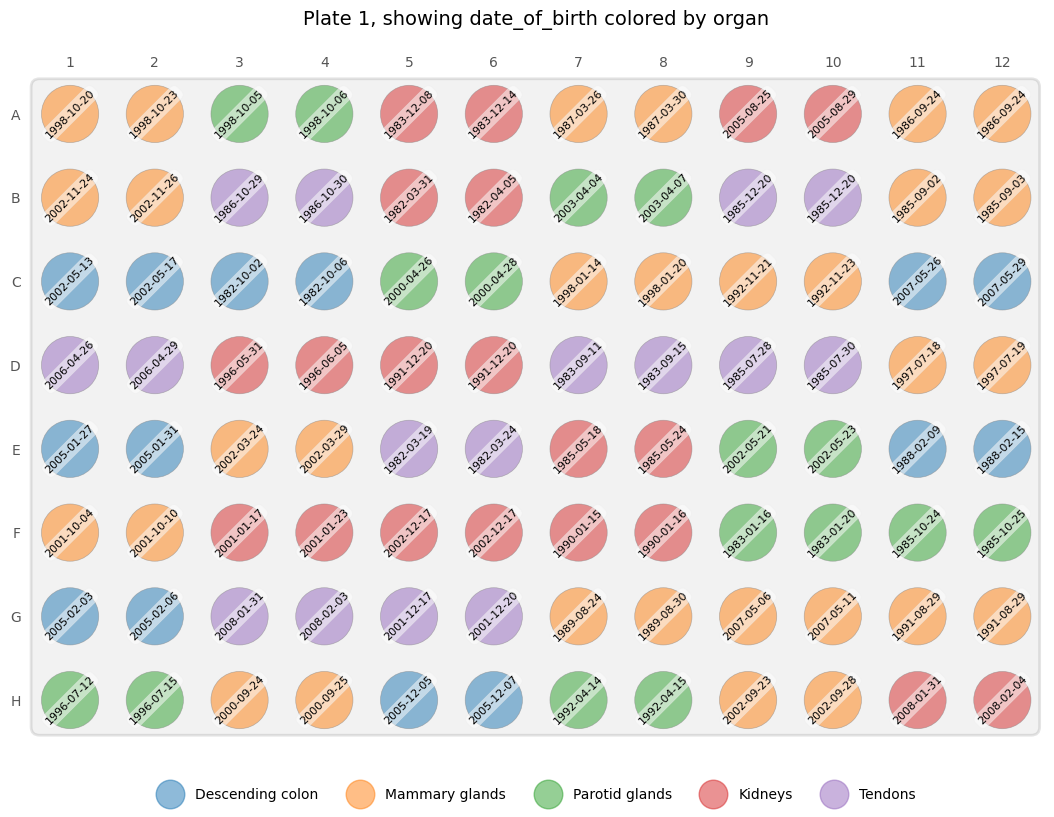

In [23]:
fig = study[0].as_figure(
    color_metadata_key="organ",
    annotation_metadata_key="date_of_birth",
    rotation=45,
    well_size=1700,
    plt_style="ggplot",
    colormap="tab10",
    alpha=0.5,
    show_grid=False,
    legend_bb=(0.15, -0.1, 0.7, 1.5),
)

In [27]:
fig.savefig("plate_layout_example.png",  transparent=True, bbox_inches='tight')

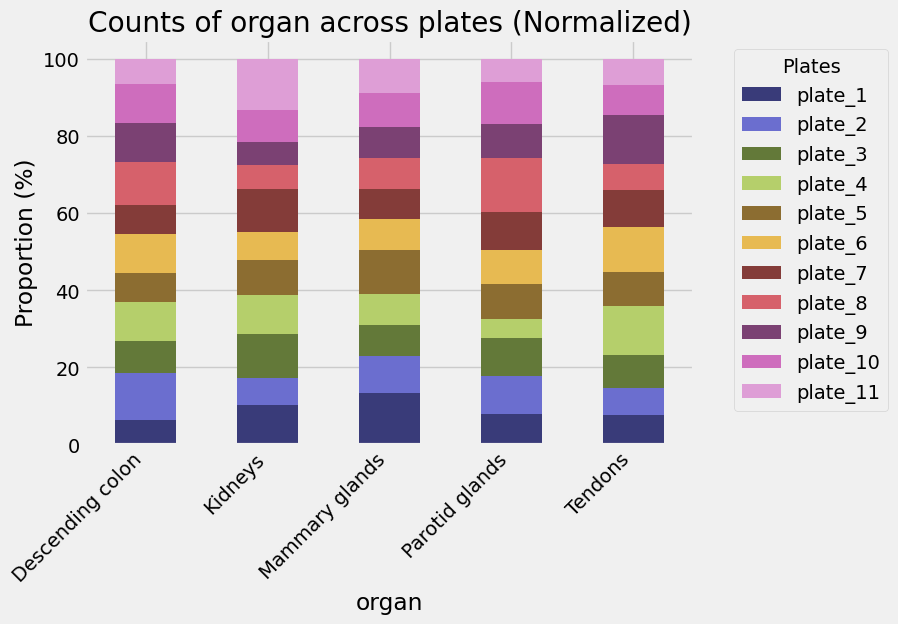

In [22]:
fig = study.plot_attribute_plate_distributions(attribute="organ", normalize=True, plt_style='fivethirtyeight')
fig.set_size_inches(w=7, h=5)
fig.savefig("study_attribute_plate_distribution_example.png",  transparent=True, bbox_inches='tight')

## QC plate

In [12]:
study_with_qc = Study("fake_study")
study_with_qc.load_sample_file(fake_samples_csv_file)

[    INFO] --- Found group index in column pair_ID
[    INFO] --- Metadata in file:
[    INFO] --- 	Unnamed: 0
[    INFO] --- 	pair_ID
[    INFO] --- 	specimen_ID
[    INFO] --- 	object
[    INFO] --- 	date_of_birth
[    INFO] --- 	barcode
[    INFO] --- 	organ


In [13]:
qc_sample_pattern = Path("../../data/plate_config_dynamic.toml")
qc_plate = QCPlate(QC_config=qc_sample_pattern)

study_with_qc.randomize_order(case_control=True)
study_with_qc.distribute_samples_to_plates(qc_plate)

[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Successfully loaded config file ../../data/plate_config_dynamic.toml
[    INFO] --- Creating dynamic plate layout with QC samples.
[    INFO] --- Using a fixed seed to random number generator for reproducibility;                 running this method will always give the same result.
[    INFO] --- Distributed samples across 14 plates.


In [14]:
len(study)

11

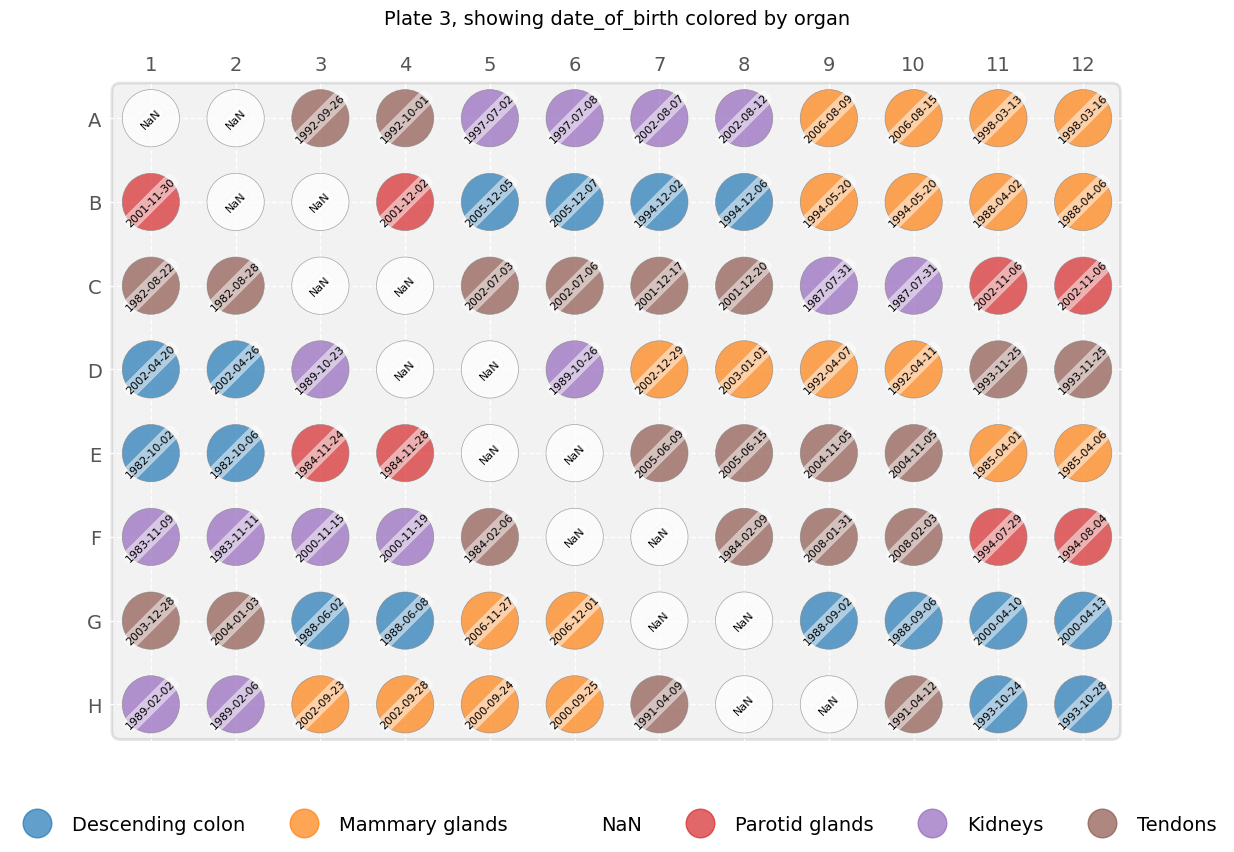

In [35]:
fig = study_with_qc[2].as_figure(
    color_metadata_key="organ",
    annotation_metadata_key="date_of_birth",
    rotation=45, well_size=1700,
    # plt_style="ggplot",
    # colormap="tab10",
    # show_grid=False,
    # alpha=0.5
    )

fig.savefig("qc_plate_layout_example.png",  transparent=True, bbox_inches='tight')

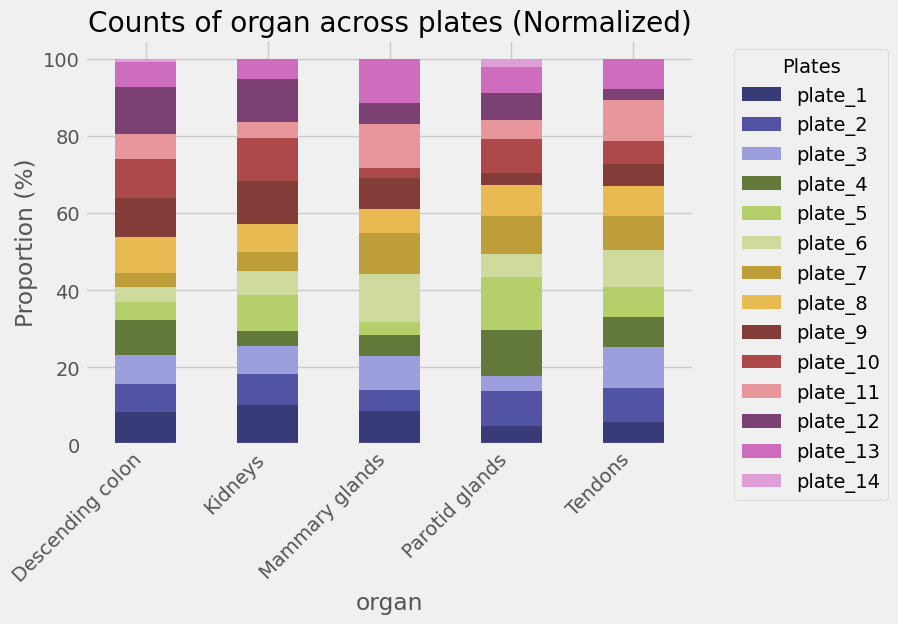

In [37]:
fig = study_with_qc.plot_attribute_plate_distributions(attribute="organ", normalize=True, plt_style="fivethirtyeight")
fig.set_size_inches(w=7, h=5)
fig.savefig("study_attribute_plate_distribution_example.png",  transparent=True, bbox_inches='tight')